In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |████████████████████████████████| 448 kB 76.1 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-11-05 01:13:20--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
route = 'your own route'
data = pd.read_csv(route+'integrated_data.csv')
data.columns = ['index', 'comments', 'sentiment', 'tokens']
data = data[['index', 'tokens', 'sentiment', 'comments']]
token = data.iloc[:, :3]
train_data = token.sample(frac=0.8, random_state=2021)
temp = pd.concat([train_data, token])
test_data = temp.drop_duplicates(['index'], keep=False)
print(len(train_data), len(test_data))

18838 4710


In [ ]:
data

,index,tokens,sentiment,comments
0,0,"['ㄹㅇ', '본방', '보고', '싶은데', '나', '만', '보면', '지는'...",0.0,ㄹㅇ 본방 보고 싶은데 나만 보면 지는 것 같아서 절대 안 볼거임 ㅜㅠㅠ
1,1,"['난', '근데', '이미', '짐작', '은', '했음']",0.0,난 근데 이미 짐작은 했음
2,2,"['주작', '이', '여도', '보기', '좋네']",0.0,주작이 여도 보기 좋네
3,3,"['설정', '인건', '알겠는데', '가슴', '찡하다', '요', 'ㅜㅜ', '...",0.0,설정 인건 알겠는데 가슴 찡하다 요ㅜㅜ 영상 항상 잘 보고 있습니당
4,4,"['너무', '소중한', '목소리']",0.0,너무 소중한 목소리
...,...,...,...,...
23543,23543,"['정우성', '이', '간첩', '같다', '안', '그럼', '저렇게', '다'...",1.0,정우성이 간첩 같다 안 그럼 저렇게 다 가진 사람이 여 자가 없냐
23544,23544,"['김제동', '이', '유튜브', '시작', '했은데', '유재석', '이효리',...",1.0,김제동이 유튜브 시작했은데 유재석 이효리 오픈 메세지 보냈다이놈들도 빨갱이 다
23545,23545,"['유해진', '개새끼', '지']",1.0,유해진 개새끼지
23546,23546,"['두', '번', '째', '는', '최악', '이', '다', '눈치', '도'...",1.0,두 번째는 최악이 다 눈치도 없고 머리 속도 통통빈 듯


In [ ]:
train_data

,index,tokens,sentiment
9572,9572,"['너무', '사랑스러워', '요', 'ㅠㅠㅠㅠㅠ']",0.0
15335,15335,"['몸', '에', '아무', '해', '를', '끼치지', '않고', '기', '...",1.0
8284,8284,"['이', '사람', '전과자', '인데', '죄목', '은', '심장', '폭행죄']",0.0
14520,14520,"['설리', '님', '10월', '14일', '쥬금']",1.0
12251,12251,"['펭귄', '부엉이', '올빼미', '짱', '개', '부칸', '똘마', '니'...",1.0
...,...,...,...
6192,6192,"['차라리', '배우', '를', '하지']",0.0
15371,15371,"['사형', '이', '답', '이다']",1.0
21673,21673,"['진짜', '믿고', '구글', '에', '총알', '티비', '검색', '했는데...",1.0
7966,7966,"['선비', '친구', '들', '에', '비', '해서라고', '했어용']",0.0


In [ ]:
test_data

,index,tokens,sentiment
4,4,"['너무', '소중한', '목소리']",0.0
14,14,"['진짜', '로', '궁금한', '거', '사진', '찍고', '폰', '을', ...",0.0
31,31,"['와', '수록', '곡', '퀄리티', '장난', '아니네', 'ㄷㄷ']",0.0
41,41,['꿀쟁'],0.0
52,52,"['진짜', '숨도', '안', '쉬', '고', '봣', '다', 'ㅋㅋㅋ', '...",0.0
...,...,...,...
23535,23535,"['서인영', '은', 'ㄹㅇ', 'ㅋㅋㅋ', '주제', '도', '모르네']",1.0
23536,23536,"['서인영', '개꼰대', '에', '인성', '쓰레기', '이휘재', '의', '...",1.0
23540,23540,"['용호', '형님', '쵞오', '유해진', '좌좀', '빨갱이', 'ㅇㅈ']",1.0
23544,23544,"['김제동', '이', '유튜브', '시작', '했은데', '유재석', '이효리',...",1.0


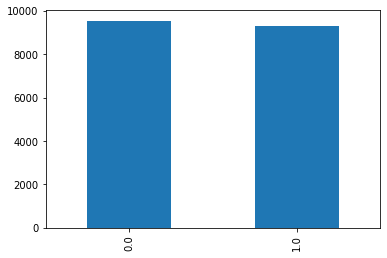

In [ ]:
train_data['sentiment'].value_counts().plot(kind='bar')

In [ ]:
print(train_data.groupby('sentiment').size().reset_index(name='count'))

   sentiment  count
0        0.0   9532
1        1.0   9306


In [ ]:
# 토큰화
mecab = Mecab()

stopwords = ['이', '듯', '으로', '고', '인', '와', '하다', '의', '한', '다,', '은', '를', '가', '좀', 
             '자', '게', '도', '과', '네', '들', '는', '지', '잘', '에', '을', '걍', '임', '하']

In [ ]:
# 훈련 데이터 토큰화
train_data['tokenized'] = train_data['tokens'].apply(lambda x: [item for item in x if item not in stopwords])

# 테스트 데이터 토큰화
test_data['tokenized'] = test_data['tokens'].apply(lambda x: [item for item in x if item not in stopwords])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# 단어 & 길이 분포 확인

# 악성 댓글 & 일반 댓글에 어떤 단어들이 많이 등장하는지
negative_words = np.hstack(train_data[train_data.sentiment == 1]['tokens'].values)
positive_words = np.hstack(train_data[train_data.sentiment == 0]['tokens'].values)

In [ ]:
# 각 단어에 대한 빈도수 카운트
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[("['ㅗ']", 4), ("['ㅂㅅ']", 3), ("['미친', '것', '들']", 3), ("['쓰레기', '들']", 3), ("['연숩생', '올', '탈의', '하는', '거', '볼', '사람', '들어와', '개', '싸는', '중', 'ㄷㄷ']", 3), ("['잼민']", 3), ("['여자', '긋지도', '않는', '년', '이', '참', '저', '거', '먹는', '새끼', '도', '참', '식성', '좋다']", 2), ("['뭐', '하는', '새끼', '지']", 2), ("['미친', '인간', '들']", 2), ("['최서윤', 'ㅈ', '까']", 2), ("['김', '여사']", 2), ("['나이', '는', '구녕', '으로', '쳐', '먹는다더니', 'ㅋㅋ']", 2), ("['딴', '따라', '병균', '들', '보고', '좋다고', '식당', '싸인', '사진', '보고', '좋다고', '한심한', '똥', '덩어리', '종자', '들', '도', '한', '심하다']", 2), ("['암', '덩어리', '들']", 2), ("['패죽', '이고', '싶다']", 2), ("['미친', '년']", 2), ("['ㅈㄹ']", 2), ("['왕따', '페미', '남자', '성추행', '이', '3', '개는', '항상', '공통', '사항', '이', '네송음', '이', '김숙', '신봉선', '알아주는', '페', '미', '년', '들', '이', '지', 'ㅉㅉㅉ', '나이', '들', '쳐', '먹고', '잘', '하는', '짓', '이다']", 2), ("['미친']", 2), ("['김지호', '는', '저', '얼굴', '로', '어떻게', '연예인', '햇', '지']", 2)]
[("['와']", 4), ("['에', '휴']", 3), ("['진짜', '존경', '스럽다']", 2), ("['고맙습니다']", 2), ("['화이팅']", 2), ("['삼가', '고인', '의', 

부정 리뷰의 평균 길이: 80.94723038187159
긍정 리뷰의 평균 길이: 94.85385772619816


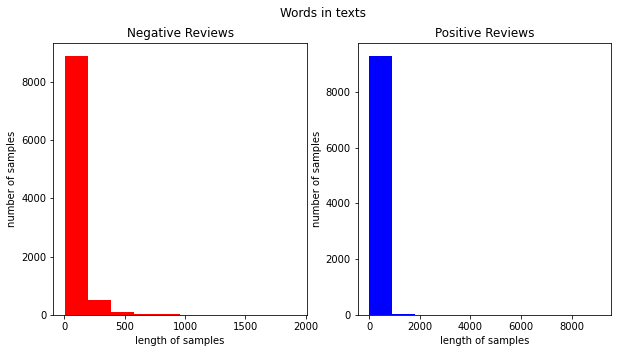

In [ ]:
# 각각 길이 분포 확인
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['sentiment']==0]['tokens'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이:', np.mean(text_len))

text_len = train_data[train_data['sentiment']==1]['tokens'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Positive Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이:', np.mean(text_len))

plt.show()

In [ ]:
X_train = train_data['tokens'].values
y_train = train_data['sentiment'].values
X_test = test_data['tokens'].values
y_test = test_data['sentiment'].values

In [ ]:
# 정수 인코딩

# 단어 집합 생성
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
# 등장 횟수가 1회인 단어들은 제외

threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0   # 등장 빈도수 < threshold 인 단어의 개수 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총합
rare_freq = 0  # 등장 빈도수 < threshold 인 단어의 등장 빈도수 총합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받아옴.
for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value

  # 단어의 등장 빈도수 < threshold 이면
  if value < threshold:
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value

print('단어 집합의 크기:', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s' % (threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어의 비율:', (rare_cnt / total_cnt) * 100) 
print('전체 등장 빈도에서 희귀 단어 등장 빈도 비율:', (rare_freq / total_freq) * 100)

단어 집합의 크기: 31675
등장 빈도가 1번 이하인 희귀 단어의 수: 17883
단어 집합에서 희귀 단어의 비율: 56.45777426992896
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.372152521174589


In [ ]:
# 등장 빈도수가 1인 단어들의 수를 제외한 단어의 개수 -> 단어 집합의 최대 크기로 제한

# 전체 단어 개수 중 빈도수 2 이하인 단어 개수는 제거
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2

vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기:', vocab_size)

단어 집합의 크기: 13794


In [ ]:
# 정수 인코딩 실행: 4629보다 큰 숫자가 부여된 단어들은 OOV로 변환

tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
# 인코딩 결과 확인
print(X_train[:3])
print(X_test[:3])

[[16, 2994, 28, 1320], [364, 5, 430, 55, 24, 1, 561, 93, 1178, 1404, 1405, 9, 136, 19, 5052, 1], [2, 29, 9400, 83, 9401, 7, 1056, 5917]]
[[16, 1678, 221], [12, 27, 2588, 10, 443, 2010, 2077, 9, 41, 109, 27, 2531, 163], [44, 5402, 1149, 6267, 532, 2294, 316]]


리뷰의 최대 길이: 1571
리뷰의 평균 길이: 14.897706762926001


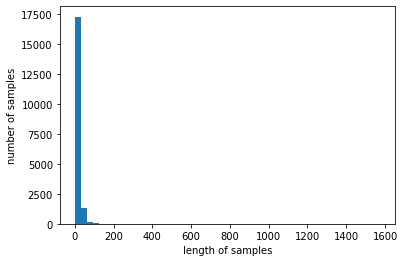

In [ ]:
# 패딩

# 전체 데이터에서 가장 길이가 긴 리뷰 & 전체 데이터의 길이 분포 확인
print('리뷰의 최대 길이:', max(len(l) for l in X_train))
print('리뷰의 평균 길이:', sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if len(s) <= max_len:
      cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s' % (max_len, (cnt / len(nested_list)) * 100))

In [ ]:
max_len = 80
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 80 이하인 샘플의 비율: 99.18250345047245


In [ ]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [ ]:
# GRU 감성분석

from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# 모델 설계
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# 모델 검증
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('gru.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
# 모델 훈련
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
252/252 [==============================] - 38s 139ms/step - loss: 0.4152 - acc: 0.8029 - val_loss: 0.3185 - val_acc: 0.8615

Epoch 00001: val_acc improved from -inf to 0.86146, saving model to gru.h5
Epoch 2/15
252/252 [==============================] - 35s 138ms/step - loss: 0.2515 - acc: 0.8989 - val_loss: 0.3273 - val_acc: 0.8570

Epoch 00002: val_acc did not improve from 0.86146
Epoch 3/15
252/252 [==============================] - 35s 138ms/step - loss: 0.1889 - acc: 0.9236 - val_loss: 0.3936 - val_acc: 0.8684

Epoch 00003: val_acc improved from 0.86146 to 0.86837, saving model to gru.h5
Epoch 4/15
252/252 [==============================] - 35s 138ms/step - loss: 0.1602 - acc: 0.9368 - val_loss: 0.2867 - val_acc: 0.8808

Epoch 00004: val_acc improved from 0.86837 to 0.88084, saving model to gru.h5
Epoch 5/15
252/252 [==============================] - 35s 138ms/step - loss: 0.1421 - acc: 0.9452 - val_loss: 0.3086 - val_acc: 0.8811

Epoch 00005: val_acc improved from 0.88

In [ ]:
model.save('your own route + /gru.h5')

In [ ]:
# 테스트 정확도 확인
loaded_model = load_model('gru.h5')
print('\n테스트 정확도: %4f' % (loaded_model.evaluate(X_test, y_test)[1]))

148/148 [==============================] - 3s 16ms/step - loss: 0.3161 - acc: 0.8807

테스트 정확도: 0.880679


In [ ]:
# 악성댓글 예측

def sentiment_predict(new_sentence):
  new_sentence = mecab.morphs(new_sentence)                               # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence])                  # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len)                      # 패딩
  score = float(loaded_model.predict(pad_new))                            # 예측
  if score > 0.4:
    print("{:.2f}% 확률로 악성 댓글입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 일반 댓글입니다.".format((1 - score) * 100))

In [ ]:
sentiment_predict('예쁜 쓰레기')

67.03% 확률로 일반 댓글입니다.


In [ ]:
sentiment_predict('제 채널 들어오셔서 10만 원 챙겨가세요!!')

80.45% 확률로 악성 댓글입니다.


In [ ]:
# 모델이 잘못 예측한 라벨링 찾기

# y_pred : 모델이 예측한 라벨링
# y_test : 정답 라벨링

y_pred = model.predict(X_test)

df1 = pd.DataFrame(y_pred)
df2 = pd.DataFrame(y_test)

df1[(df1[0] < 0.5)] = 0
df1[(df1[0] >= 0.5)] = 1

df = pd.DataFrame(df1[(df1[0] != df2[0])])
df

,0
4,1.0
13,1.0
27,1.0
39,1.0
43,1.0
...,...
4591,0.0
4599,0.0
4620,0.0
4638,0.0


In [ ]:
X_test

4                                     ['너무', '소중한', '목소리']
14       ['진짜', '로', '궁금한', '거', '사진', '찍고', '폰', '을', ...
31              ['와', '수록', '곡', '퀄리티', '장난', '아니네', 'ㄷㄷ']
41                                                  ['꿀쟁']
52       ['진짜', '숨도', '안', '쉬', '고', '봣', '다', 'ㅋㅋㅋ', '...
                               ...                        
23535          ['서인영', '은', 'ㄹㅇ', 'ㅋㅋㅋ', '주제', '도', '모르네']
23536    ['서인영', '개꼰대', '에', '인성', '쓰레기', '이휘재', '의', '...
23540         ['용호', '형님', '쵞오', '유해진', '좌좀', '빨갱이', 'ㅇㅈ']
23544    ['김제동', '이', '유튜브', '시작', '했은데', '유재석', '이효리',...
23545                                  ['유해진', '개새끼', '지']
Name: tokens, Length: 4710, dtype: object

In [ ]:
df1

,0
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0
...,...
4705,1.0
4706,1.0
4707,1.0
4708,1.0


In [ ]:
df2

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
4705,1.0
4706,1.0
4707,1.0
4708,1.0


In [ ]:
len(y_pred)

4710

In [ ]:
len(X_test)

4710

In [ ]:
X_test

array([[   0,    0,    0, ...,   16, 1678,  221],
       [   0,    0,    0, ...,   27, 2531,  163],
       [   0,    0,    0, ...,  532, 2294,  316],
       ...,
       [   0,    0,    0, ..., 3309,  860, 1324],
       [   0,    0,    0, ...,    6,  860,    8],
       [   0,    0,    0, ..., 6953,  594,   35]], dtype=int32)